# <center><u> GRU - Multivariate

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
from dotenv import load_dotenv

load_dotenv()

db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [81]:
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

In [82]:
query="""
    select * 
    from agg.tidy_data_30min
    where site = 64
"""

In [83]:
df = pd.read_sql_query(query, conn)

/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_1608/1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [84]:
# Convert 'ts' to datetime and set as index
# df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp', drop=False)
df = df.sort_index()

df

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,...,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,2019-04-01 00:00:00+00:00,64,2019,4,1,1,0,0,2,14.620,...,2.0,97.0,12.0,0.0,0.0,152.86,15.4150,138.56,18.69,0
2019-04-01 00:30:00+00:00,2019-04-01 00:30:00+00:00,64,2019,4,1,1,30,0,2,16.700,...,2.0,97.0,12.0,0.0,0.0,204.52,15.3175,166.11,18.60,0
2019-04-01 01:00:00+00:00,2019-04-01 01:00:00+00:00,64,2019,4,1,2,0,0,2,20.270,...,3.0,99.0,11.0,0.0,0.0,214.66,15.8375,179.70,31.03,0
2019-04-01 01:30:00+00:00,2019-04-01 01:30:00+00:00,64,2019,4,1,2,30,0,2,15.870,...,3.0,99.0,11.0,0.0,0.0,209.72,15.8775,177.33,52.99,0
2019-04-01 02:00:00+00:00,2019-04-01 02:00:00+00:00,64,2019,4,1,3,0,0,2,15.120,...,6.0,100.0,11.0,0.0,0.0,230.59,16.3350,212.62,65.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,2020-03-31 20:30:00+00:00,64,2020,3,31,21,30,1,2,14.390,...,NaN,NaN,NaN,NaN,NaN,282.00,15.4650,264.64,19.82,0
2020-03-31 21:00:00+00:00,2020-03-31 21:00:00+00:00,64,2020,3,31,22,0,1,2,14.710,...,NaN,NaN,NaN,NaN,NaN,321.01,14.5975,220.50,16.55,0
2020-03-31 21:30:00+00:00,2020-03-31 21:30:00+00:00,64,2020,3,31,22,30,1,2,14.950,...,NaN,NaN,NaN,NaN,NaN,353.42,14.7625,206.66,30.23,0


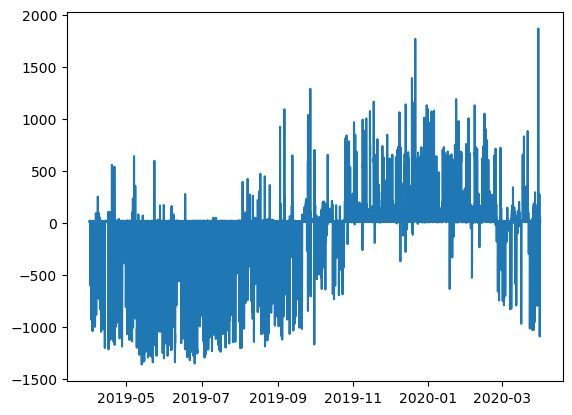

In [85]:
plt.plot(df.index, df.net_load)
plt.show()

High-resolution net load forecasting for micro-neighbourhoods with high
penetration of renewable energy sources
P. Kobylinskia
, M. Wierzbowskia
, K. Piotrowskib,

In [94]:
df['net_load_norm'] = df['net_load'] / max(abs(df['net_load']))

df

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,...,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday,net_load_norm
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,2019-04-01 00:00:00+00:00,64,2019,4,1,1,0,0,2,14.620,...,97.0,12.0,0.0,0.0,152.86,15.4150,138.56,18.69,0,0.007819
2019-04-01 00:30:00+00:00,2019-04-01 00:30:00+00:00,64,2019,4,1,1,30,0,2,16.700,...,97.0,12.0,0.0,0.0,204.52,15.3175,166.11,18.60,0,0.008931
2019-04-01 01:00:00+00:00,2019-04-01 01:00:00+00:00,64,2019,4,1,2,0,0,2,20.270,...,99.0,11.0,0.0,0.0,214.66,15.8375,179.70,31.03,0,0.010840
2019-04-01 01:30:00+00:00,2019-04-01 01:30:00+00:00,64,2019,4,1,2,30,0,2,15.870,...,99.0,11.0,0.0,0.0,209.72,15.8775,177.33,52.99,0,0.008487
2019-04-01 02:00:00+00:00,2019-04-01 02:00:00+00:00,64,2019,4,1,3,0,0,2,15.120,...,100.0,11.0,0.0,0.0,230.59,16.3350,212.62,65.21,0,0.008086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,2020-03-31 20:30:00+00:00,64,2020,3,31,21,30,1,2,14.390,...,NaN,NaN,NaN,NaN,282.00,15.4650,264.64,19.82,0,0.007696
2020-03-31 21:00:00+00:00,2020-03-31 21:00:00+00:00,64,2020,3,31,22,0,1,2,14.710,...,NaN,NaN,NaN,NaN,321.01,14.5975,220.50,16.55,0,0.007867
2020-03-31 21:30:00+00:00,2020-03-31 21:30:00+00:00,64,2020,3,31,22,30,1,2,14.950,...,NaN,NaN,NaN,NaN,353.42,14.7625,206.66,30.23,0,0.007995


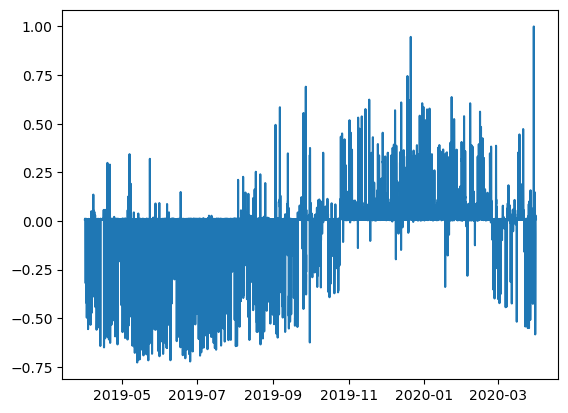

In [87]:
plt.plot(df.index, df.net_load_norm)
plt.show()

## Dataset Preparation

In [95]:
##Parameters

#n_input = no. of time steps considered before making the prediction
#n_features = no. of variables/features considered
#n_output = no. of time steps to forecast

# Note: 1 time step = 30 mins
# Look at the last two weeks to forecast the next 36 hours

# 1 day = 2 * 24 * 1 = 24
# 2 hours = 2 * 2 = 8 

n_input = 24
n_features = 8
n_output = 12


# Select which features are to be inputted into the LSTM i.e., which columns in the df
df_input = df[['net_load_norm','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday']]
df_input

,net_load_norm,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday
timestamp,,,,,,,,
2019-04-01 00:00:00+00:00,0.007819,4,1,1,0,2,152.86,0
2019-04-01 00:30:00+00:00,0.008931,4,1,1,0,2,204.52,0
2019-04-01 01:00:00+00:00,0.010840,4,1,2,0,2,214.66,0
2019-04-01 01:30:00+00:00,0.008487,4,1,2,0,2,209.72,0
2019-04-01 02:00:00+00:00,0.008086,4,1,3,0,2,230.59,0
...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.007696,3,31,21,1,2,282.00,0
2020-03-31 21:00:00+00:00,0.007867,3,31,22,1,2,321.01,0
2020-03-31 21:30:00+00:00,0.007995,3,31,22,1,2,353.42,0


In [96]:
#Scale Average Net Load
scaler = MinMaxScaler()
df_input['avg_net_load'] = scaler.fit_transform(df_input[['avg_net_load']])
df_input.rename(columns={'net_load_norm': 'net_load'}, inplace=True)
df_input

/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_1608/1634369030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['avg_net_load'] = scaler.fit_transform(df_input[['avg_net_load']])
/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_1608/1634369030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input.rename(columns={'net_load_norm': 'net_load'}, inplace=True)


,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday
timestamp,,,,,,,,
2019-04-01 00:00:00+00:00,0.007819,4,1,1,0,2,0.959199,0
2019-04-01 00:30:00+00:00,0.008931,4,1,1,0,2,0.960635,0
2019-04-01 01:00:00+00:00,0.010840,4,1,2,0,2,0.960917,0
2019-04-01 01:30:00+00:00,0.008487,4,1,2,0,2,0.960780,0
2019-04-01 02:00:00+00:00,0.008086,4,1,3,0,2,0.961360,0
...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.007696,3,31,21,1,2,0.962789,0
2020-03-31 21:00:00+00:00,0.007867,3,31,22,1,2,0.963873,0
2020-03-31 21:30:00+00:00,0.007995,3,31,22,1,2,0.964774,0


In [98]:
X, y = [], []
for i in range(len(df_input) - n_input - n_output + 1):
    # Select all columns for the input sequence
    X.append(df_input.iloc[i:(i + n_input)].values)  
    
    y.append(df_input['net_load'].iloc[(i + n_input):(i + n_input + n_output)].values)

X = np.array(X).reshape((len(X), n_input, -1))  
y = np.array(y)

In [99]:
X.shape

(17504, 24, 8)

In [100]:
y.shape

(17504, 12)

### First Set of X and Y

In [101]:
print(f'Given the array X: \n {X[0].flatten()}\n')
print(f'Predict this y: \n {y[0]}\n')

Given the array X: 
 [7.81855811e-03 4.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 9.59199240e-01 0.00000000e+00
 8.93091111e-03 4.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60635225e-01 0.00000000e+00
 1.08400939e-02 4.00000000e+00 1.00000000e+00 2.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60917085e-01 0.00000000e+00
 8.48703948e-03 4.00000000e+00 1.00000000e+00 2.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60779768e-01 0.00000000e+00
 8.08595066e-03 4.00000000e+00 1.00000000e+00 3.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61359888e-01 0.00000000e+00
 1.16369237e-02 4.00000000e+00 1.00000000e+00 3.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61080808e-01 0.00000000e+00
 1.20487082e-02 4.00000000e+00 1.00000000e+00 4.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61916103e-01 0.00000000e+00
 8.35869106e-03 4.00000000e+00 1.00000000e+00 4.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60466498e-01 0.00000000e+00
 7.

### Second Set of X and Y

In [102]:
print(f'Given the array X: \n {X[1].flatten()}\n')
print(f'Predict this y: \n {y[1]}\n')

Given the array X: 
 [8.93091111e-03 4.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60635225e-01 0.00000000e+00
 1.08400939e-02 4.00000000e+00 1.00000000e+00 2.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60917085e-01 0.00000000e+00
 8.48703948e-03 4.00000000e+00 1.00000000e+00 2.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60779768e-01 0.00000000e+00
 8.08595066e-03 4.00000000e+00 1.00000000e+00 3.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61359888e-01 0.00000000e+00
 1.16369237e-02 4.00000000e+00 1.00000000e+00 3.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61080808e-01 0.00000000e+00
 1.20487082e-02 4.00000000e+00 1.00000000e+00 4.00000000e+00
 0.00000000e+00 2.00000000e+00 9.61916103e-01 0.00000000e+00
 8.35869106e-03 4.00000000e+00 1.00000000e+00 4.00000000e+00
 0.00000000e+00 2.00000000e+00 9.60466498e-01 0.00000000e+00
 7.95760224e-03 4.00000000e+00 1.00000000e+00 5.00000000e+00
 0.00000000e+00 2.00000000e+00 9.63544442e-01 0.00000000e+00
 7.

## Train/Test Split

In [103]:
# Split into train (First 300 days) and test (the rest i.e., ~60 days depending on how big the n_input variable is set )
# 1 time step = 30 mins

n_split = 2 * 24 * 300 

X_train = X[:n_split]
y_train = y[:n_split]

X_test = X[n_split:]
y_test = y[n_split:]

In [104]:
X_train.shape

(14400, 24, 8)

In [105]:
y_train.shape

(14400, 12)

In [106]:
X_test.shape

(3104, 24, 8)

In [107]:
y_test.shape

(3104, 12)

## <center> <u> GRU Model 1

In [108]:
model1 = Sequential()
model1.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model1.add(GRU(64, activation='relu', return_sequences=True ))
model1.add(GRU(32, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(y_train.shape[1]))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 128)           52992     
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 100,044
Trainable params: 100,044
Non-trainable params: 0
_________________________________________________________________


In [109]:
cp1 = ModelCheckpoint('model2.keras', save_best_only=True)
model1.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [110]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history = model1.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10


2024-03-29 16:03:01.173144: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


810/810 [==============================] - 14s 16ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - mean_absolute_error: 0.0842 - val_loss: 0.0245 - val_mean_squared_error: 0.0245 - val_mean_absolute_error: 0.0991
Epoch 2/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - mean_absolute_error: 0.0617 - val_loss: 0.0253 - val_mean_squared_error: 0.0253 - val_mean_absolute_error: 0.1039
Epoch 3/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - mean_absolute_error: 0.0593 - val_loss: 0.0224 - val_mean_squared_error: 0.0224 - val_mean_absolute_error: 0.0935
Epoch 4/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0573 - val_loss: 0.0202 - val_mean_squared_error: 0.0202 - val_mean_absolute_error: 0.0860
Epoch 5/10
810/810 [==============================] - 12s 15ms/step - loss: 0.0111 - mean_squared_e

### Check Training Results

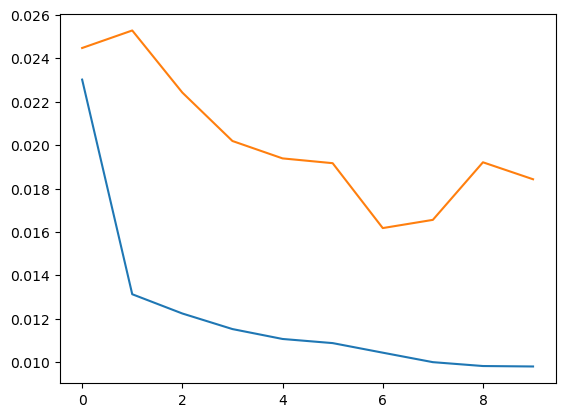

In [111]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

### Plot Training Results

In [113]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

In [114]:
print(f"n_ouput: {n_output}")

n_ouput: 12


1/1 [==============================] - 0s 13ms/step


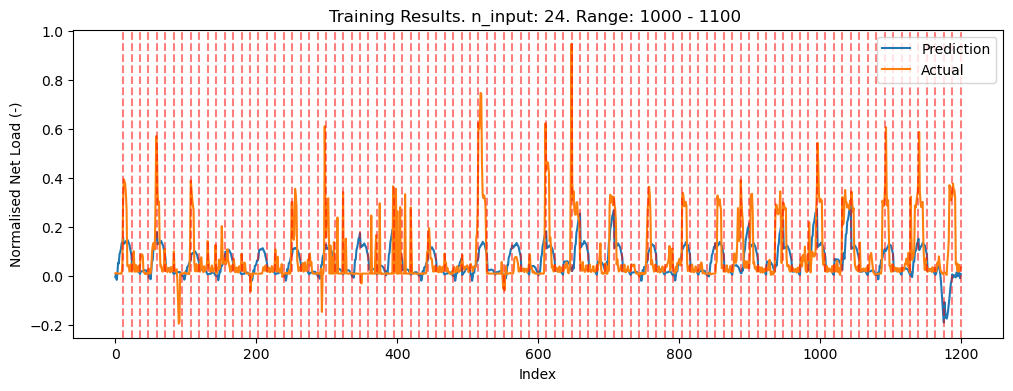

In [115]:
start_section = 1000
end_section = 1100
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model1.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Plot Testing Results

In [117]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 12ms/step


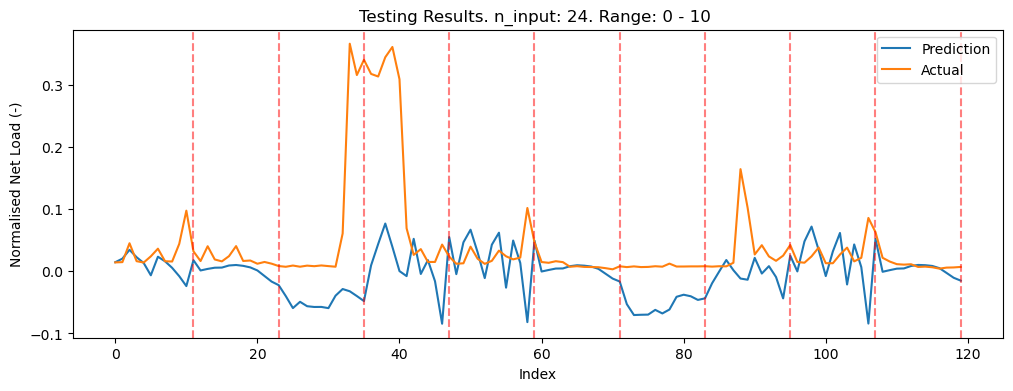

In [118]:
start_section = 0
end_section = 10
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model1.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

## <center> <u> GRU Model 2